[1]	valid_0's multi_logloss: 0.970887
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 0.864532
[3]	valid_0's multi_logloss: 0.779917
[4]	valid_0's multi_logloss: 0.707497
[5]	valid_0's multi_logloss: 0.645129
[6]	valid_0's multi_logloss: 0.591042
[7]	valid_0's multi_logloss: 0.543982
[8]	valid_0's multi_logloss: 0.502835
[9]	valid_0's multi_logloss: 0.466801
[10]	valid_0's multi_logloss: 0.435132
[11]	valid_0's multi_logloss: 0.407284
[12]	valid_0's multi_logloss: 0.381414
[13]	valid_0's multi_logloss: 0.359666
[14]	valid_0's multi_logloss: 0.339154
[15]	valid_0's multi_logloss: 0.317667
[16]	valid_0's multi_logloss: 0.301499
[17]	valid_0's multi_logloss: 0.287181
[18]	valid_0's multi_logloss: 0.271601
[19]	valid_0's multi_logloss: 0.260474
[20]	valid_0's multi_logloss: 0.250888
[21]	valid_0's multi_logloss: 0.241843
[22]	valid_0's multi_logloss: 0.231579
[23]	valid_0's multi_logloss: 0.224591
[24]	valid_0's multi_logloss: 0.218299
[25]	valid_

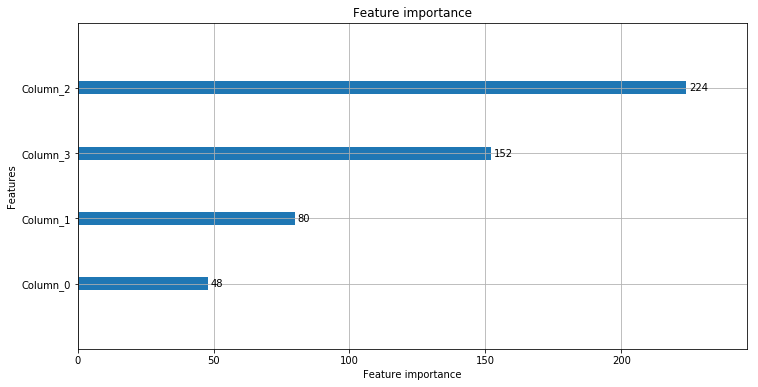

In [12]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

import numpy as np

"""LightGBM を使った多値分類のサンプルコード"""


def main():
    # Iris データセットを読み込む
    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    # 訓練データとテストデータに分割する
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # テスト用のデータを評価用と検証用に分ける→evalがパラメータチューニング用のデータで、validがチューニングを終えたモデルで、精度を見るためのデータ
    X_eval, X_valid, y_eval, y_valid = train_test_split(X_test, y_test, random_state=42)

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    ##パラメータチューニングしないときは、この直下のデータでok
    #lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    lgb_eval = lgb.Dataset(X_eval, y_eval, reference=lgb_train)

    # LightGBM のハイパーパラメータ
    lgbm_params = {
        # 多値分類問題
        'objective': 'multiclass',
        # クラス数は 3
        'num_class': 3,
    }

    #cv_results = lgb.cv(lgbm_params, lgb_train, nfold=10)
    #cv_logloss = cv_results['multi_logloss-mean']
    #round_n = np.arange(len(cv_logloss))

    #plt.xlabel('round')
    #plt.ylabel('logloss')
    #plt.plot(round_n, cv_logloss)
    #plt.show()
    
    
    
    
    # 上記のパラメータでモデルを学習する
    #model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval , num_boost_round=38)
    
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)

    # 学習したモデルでホールドアウト検証する
    y_pred_proba = model.predict(X_valid, num_iteration=model.best_iteration)
    
    # 返り値は確率になっているので最尤に寄せる
    y_pred = np.argmax(y_pred_proba, axis=1)

    # 精度 (Accuracy) を計算する
    accuracy = accuracy_score(y_valid, y_pred)
    print(accuracy)
    
    
    # テストデータを予測する
    #y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    #y_pred_max = np.argmax(y_pred, axis=1)  # 最尤と判断したクラスの値にする

    # 精度 (Accuracy) を計算する
    #accuracy = sum(y_test == y_pred_max) / len(y_test)
    #print(accuracy)

    lgb.plot_importance(model, figsize=(12, 6))
    plt.show()

if __name__ == '__main__':
    main()